In [3]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
from sklearn import preprocessing
import matplotlib.patches as mpatches

def Media(dataFrame, agrupadoPor, mediaDe) :
    media = dataFrame.groupby(dataFrame[agrupadoPor]).mean()
    df_media = pd.DataFrame(media[mediaDe])
    df_media.reset_index(inplace = True)
        
    return df_media

def Contador(dataFrame, contado, bagulho , nome) :
    contador = dataFrame.groupby(dataFrame[contado]).count()
    df_contador = pd.DataFrame(contador[bagulho])
    df_contador.reset_index(inplace = True)
    df_contador = df_contador.rename(columns = {bagulho : nome})
    
    return df_contador

def Outlieador(dataFrame , coluna, trashHold) :
    outlier = dataFrame[dataFrame[coluna] > trashHold]
    outlier.reset_index(inplace = True)
    
    return outlier

def SeparaAno(dataFrame, anoInicio, anoFim) :
    df_ano = dataFrame.loc[dataFrame['Date'].dt.year.between(anoInicio , anoFim , inclusive = True)]
    
    return df_ano

pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

df_chinese = pd.read_csv("Datasets/chinese.csv", sep = ';')
df_french = pd.read_csv("Datasets/french.csv", sep = ';')
df_german = pd.read_csv("Datasets/german.csv", sep = ';')
df_japanese = pd.read_csv("Datasets/japanese.csv", sep = ';')
df_portuguese = pd.read_csv("Datasets/portuguese.csv", sep = ';')
df_russian = pd.read_csv("Datasets/russian.csv", sep = ';')

df_chinese['Duration'] = df_chinese['Duration'].map(lambda x:x.split(' ')[0])
df_chinese['Duration'] = pd.to_numeric(df_chinese['Duration'] ,downcast = 'float')
df_chinese['Date'] =  pd.to_datetime(df_chinese['Date'], format = '%b %d, %Y, %H:%M')
df_chinese['Viewers'] = df_chinese['Viewers'].apply(lambda x: x*1000)
df_chinese['Viewers'] = df_chinese['Viewers'].apply(lambda x: x/1000 if x%1000==0 else x)

df_french['Duration'] = df_french['Duration'].map(lambda x:x.split(' ')[0])
df_french['Duration'] = pd.to_numeric(df_french['Duration'] ,downcast = 'float')
df_french['Date'] =  pd.to_datetime(df_french['Date'], format = '%b %d, %Y, %H:%M')
df_french['Viewers'] = df_french['Viewers'].apply(lambda x: x*1000)
df_french['Viewers'] = df_french['Viewers'].apply(lambda x: x/1000 if x%1000==0 else x)

df_german['Duration'] = df_german['Duration'].map(lambda x:x.split(' ')[0])
df_german['Duration'] = pd.to_numeric(df_german['Duration'] ,downcast = 'float')
df_german['Date'] =  pd.to_datetime(df_german['Date'], format = '%b %d, %Y, %H:%M')
df_german['Viewers'] = df_german['Viewers'].apply(lambda x: x*1000)
df_german['Viewers'] = df_german['Viewers'].apply(lambda x: x/1000 if x%1000==0 else x)

df_japanese['Duration'] = df_japanese['Duration'].map(lambda x:x.split(' ')[0])
df_japanese['Duration'] = pd.to_numeric(df_japanese['Duration'] ,downcast = 'float')
df_japanese['Date'] =  pd.to_datetime(df_japanese['Date'], format = '%b %d, %Y, %H:%M')
df_japanese['Viewers'] = df_japanese['Viewers'].apply(lambda x: x*1000)
df_japanese['Viewers'] = df_japanese['Viewers'].apply(lambda x: x/1000 if x%1000==0 else x)

df_portuguese['Duration'] = df_portuguese['Duration'].map(lambda x:x.split(' ')[0])
df_portuguese['Duration'] = pd.to_numeric(df_portuguese['Duration'] ,downcast = 'float')
df_portuguese['Date'] =  pd.to_datetime(df_portuguese['Date'], format = '%b %d, %Y, %H:%M')
df_portuguese['Viewers'] = df_portuguese['Viewers'].apply(lambda x: x*1000)
df_portuguese['Viewers'] = df_portuguese['Viewers'].apply(lambda x: x/1000 if x%1000==0 else x)

df_russian['Duration'] = df_russian['Duration'].map(lambda x:x.split(' ')[0])
df_russian['Duration'] = pd.to_numeric(df_russian['Duration'] ,downcast = 'float')
df_russian['Date'] =  pd.to_datetime(df_russian['Date'], format = '%b %d, %Y, %H:%M')
df_russian['Viewers'] = df_russian['Viewers'].apply(lambda x: x*1000)
df_russian['Viewers'] = df_russian['Viewers'].apply(lambda x: x/1000 if x%1000==0 else x)

frame_world = [df_chinese, df_french, df_german, df_japanese, df_portuguese, df_russian]
df_world = pd.concat(frame_world)




df_duration = Media(df_world, 'Streamer', 'Duration')
df_viewers = Media(df_world, 'Streamer' , 'Viewers')
df_lives = Contador(df_world, 'Streamer', 'Date', 'Lives')

outlier_duration = Outlieador(df_duration, 'Duration' , 12)
outlier_lives = Outlieador(df_lives, 'Lives', 1100)
outlier_viewers = Outlieador(df_viewers, 'Viewers', 5000)

In [4]:
df_2020_german = SeparaAno(df_german, 2020, 2020)
df_2019_german = SeparaAno(df_german, 2019, 2019)
df_2018_german = SeparaAno(df_german, 2018, 2018)
df_2017_german = SeparaAno(df_german, 2017, 2017)

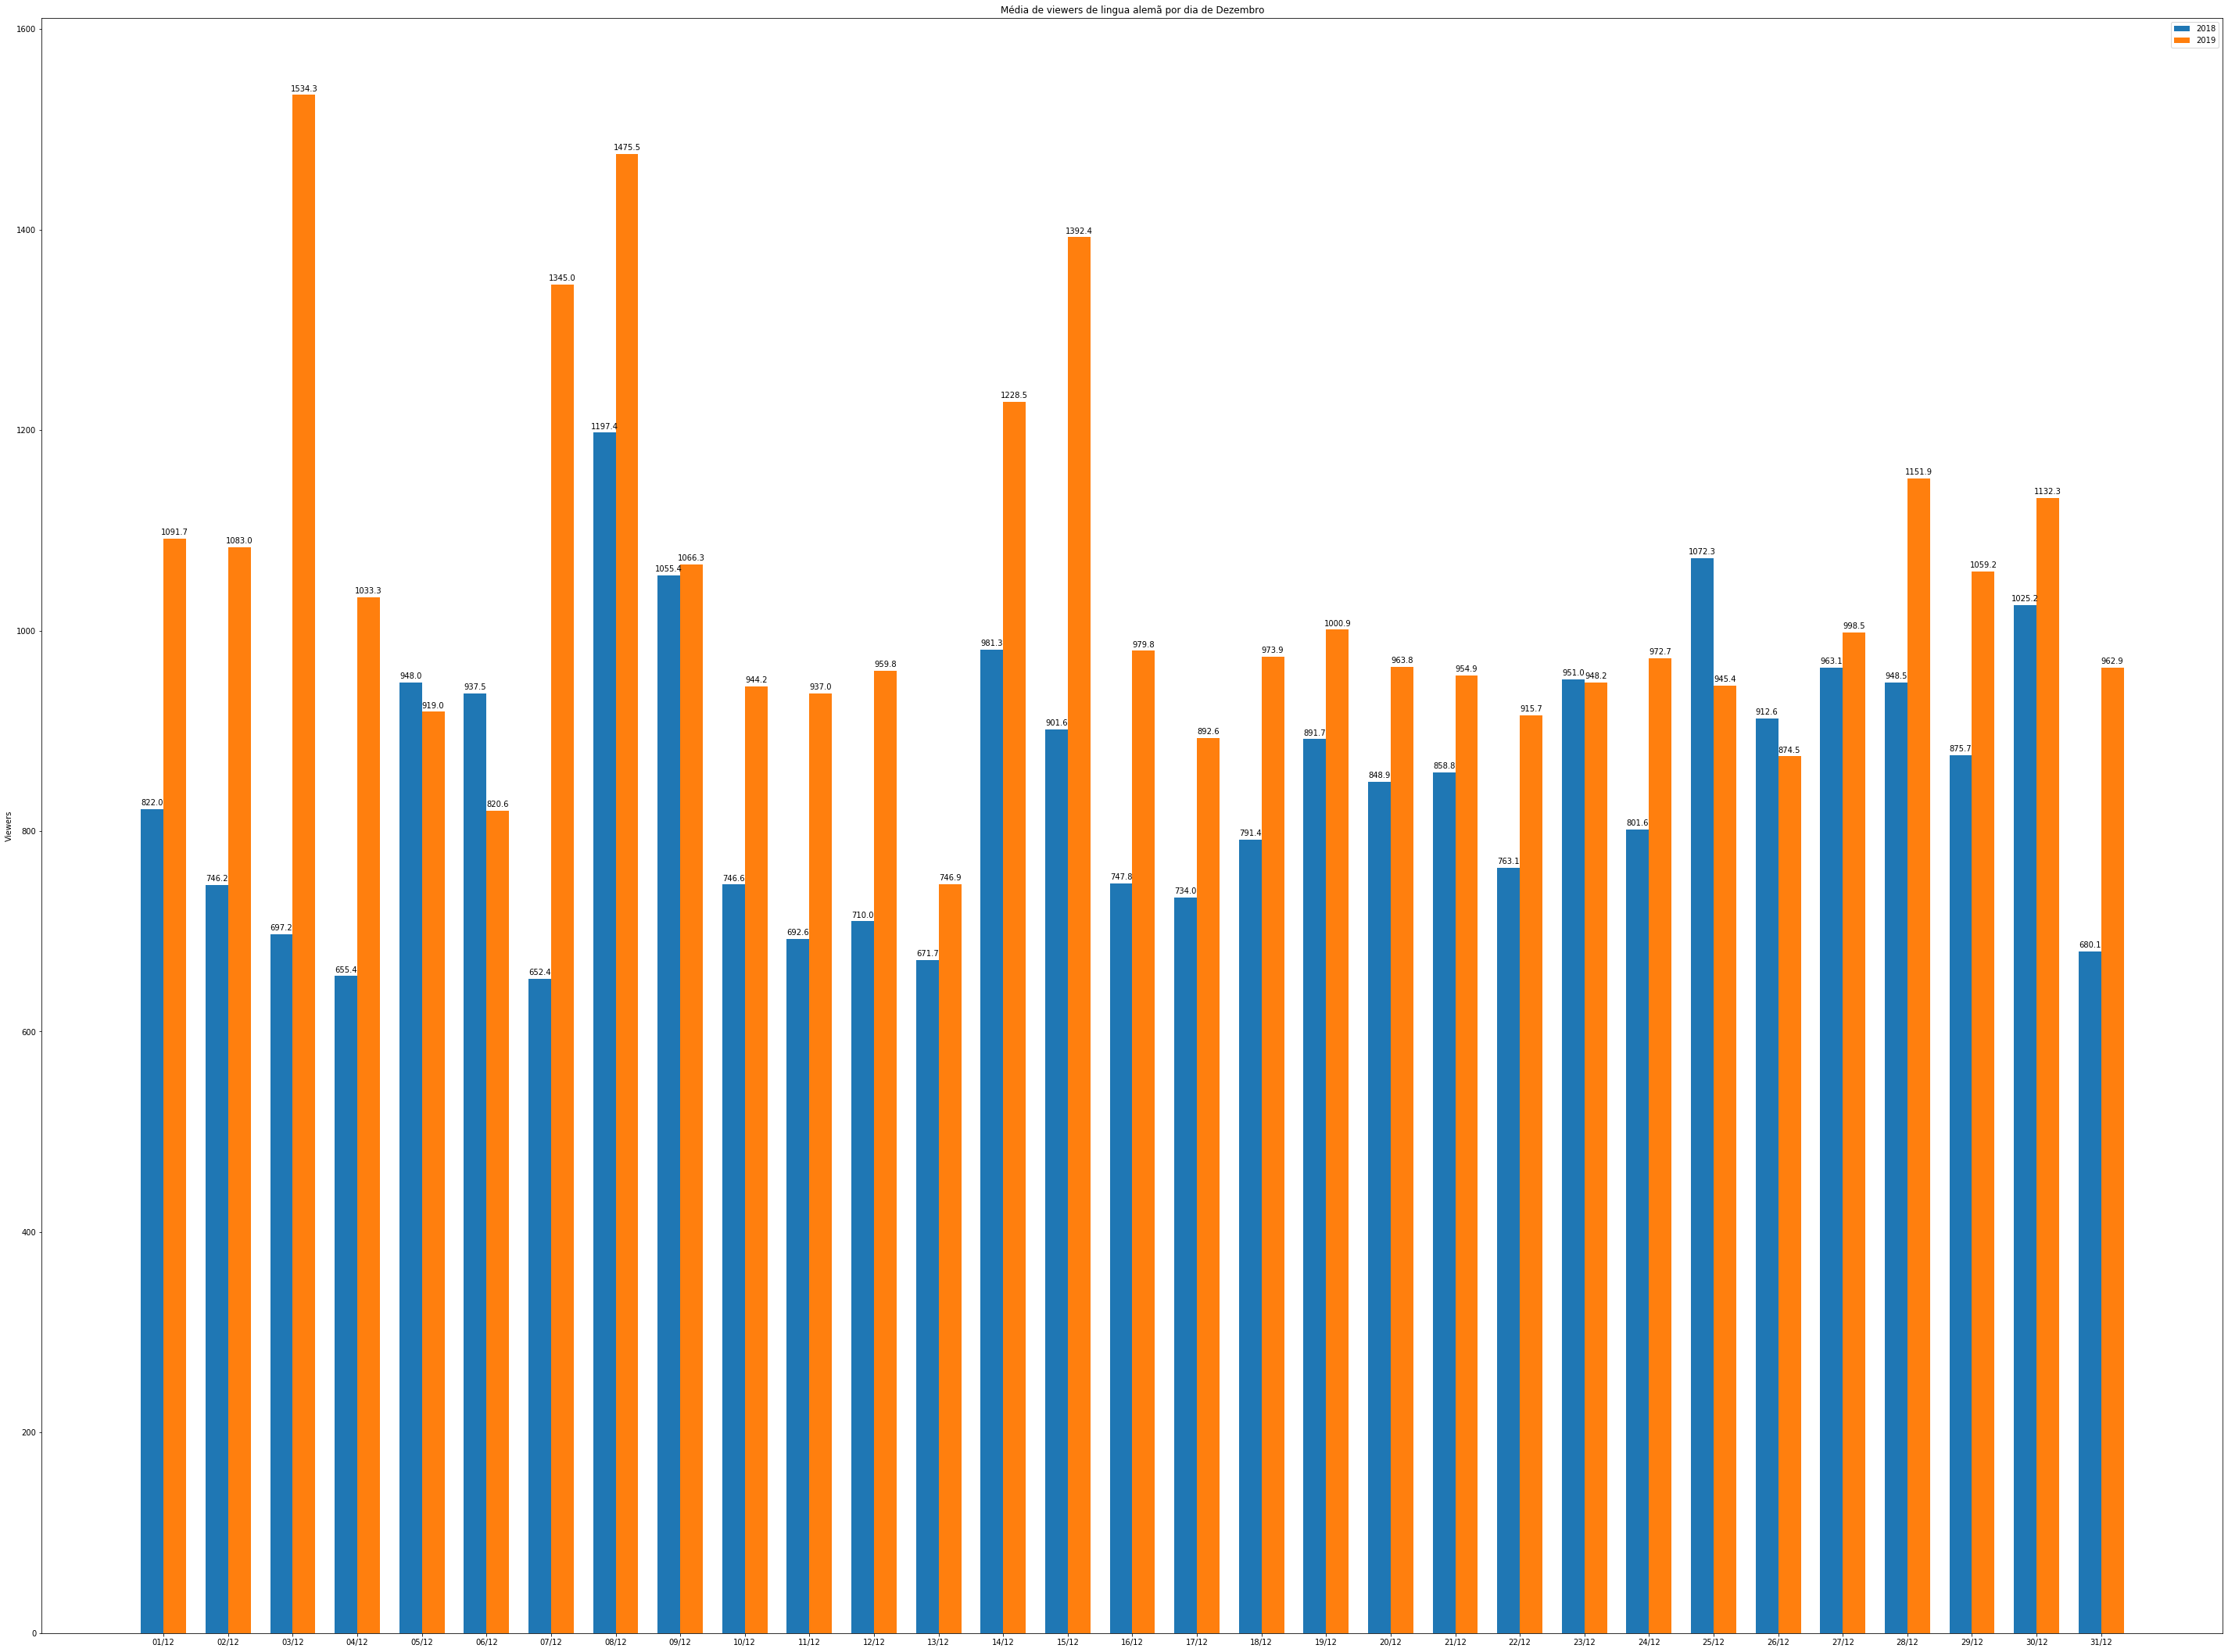

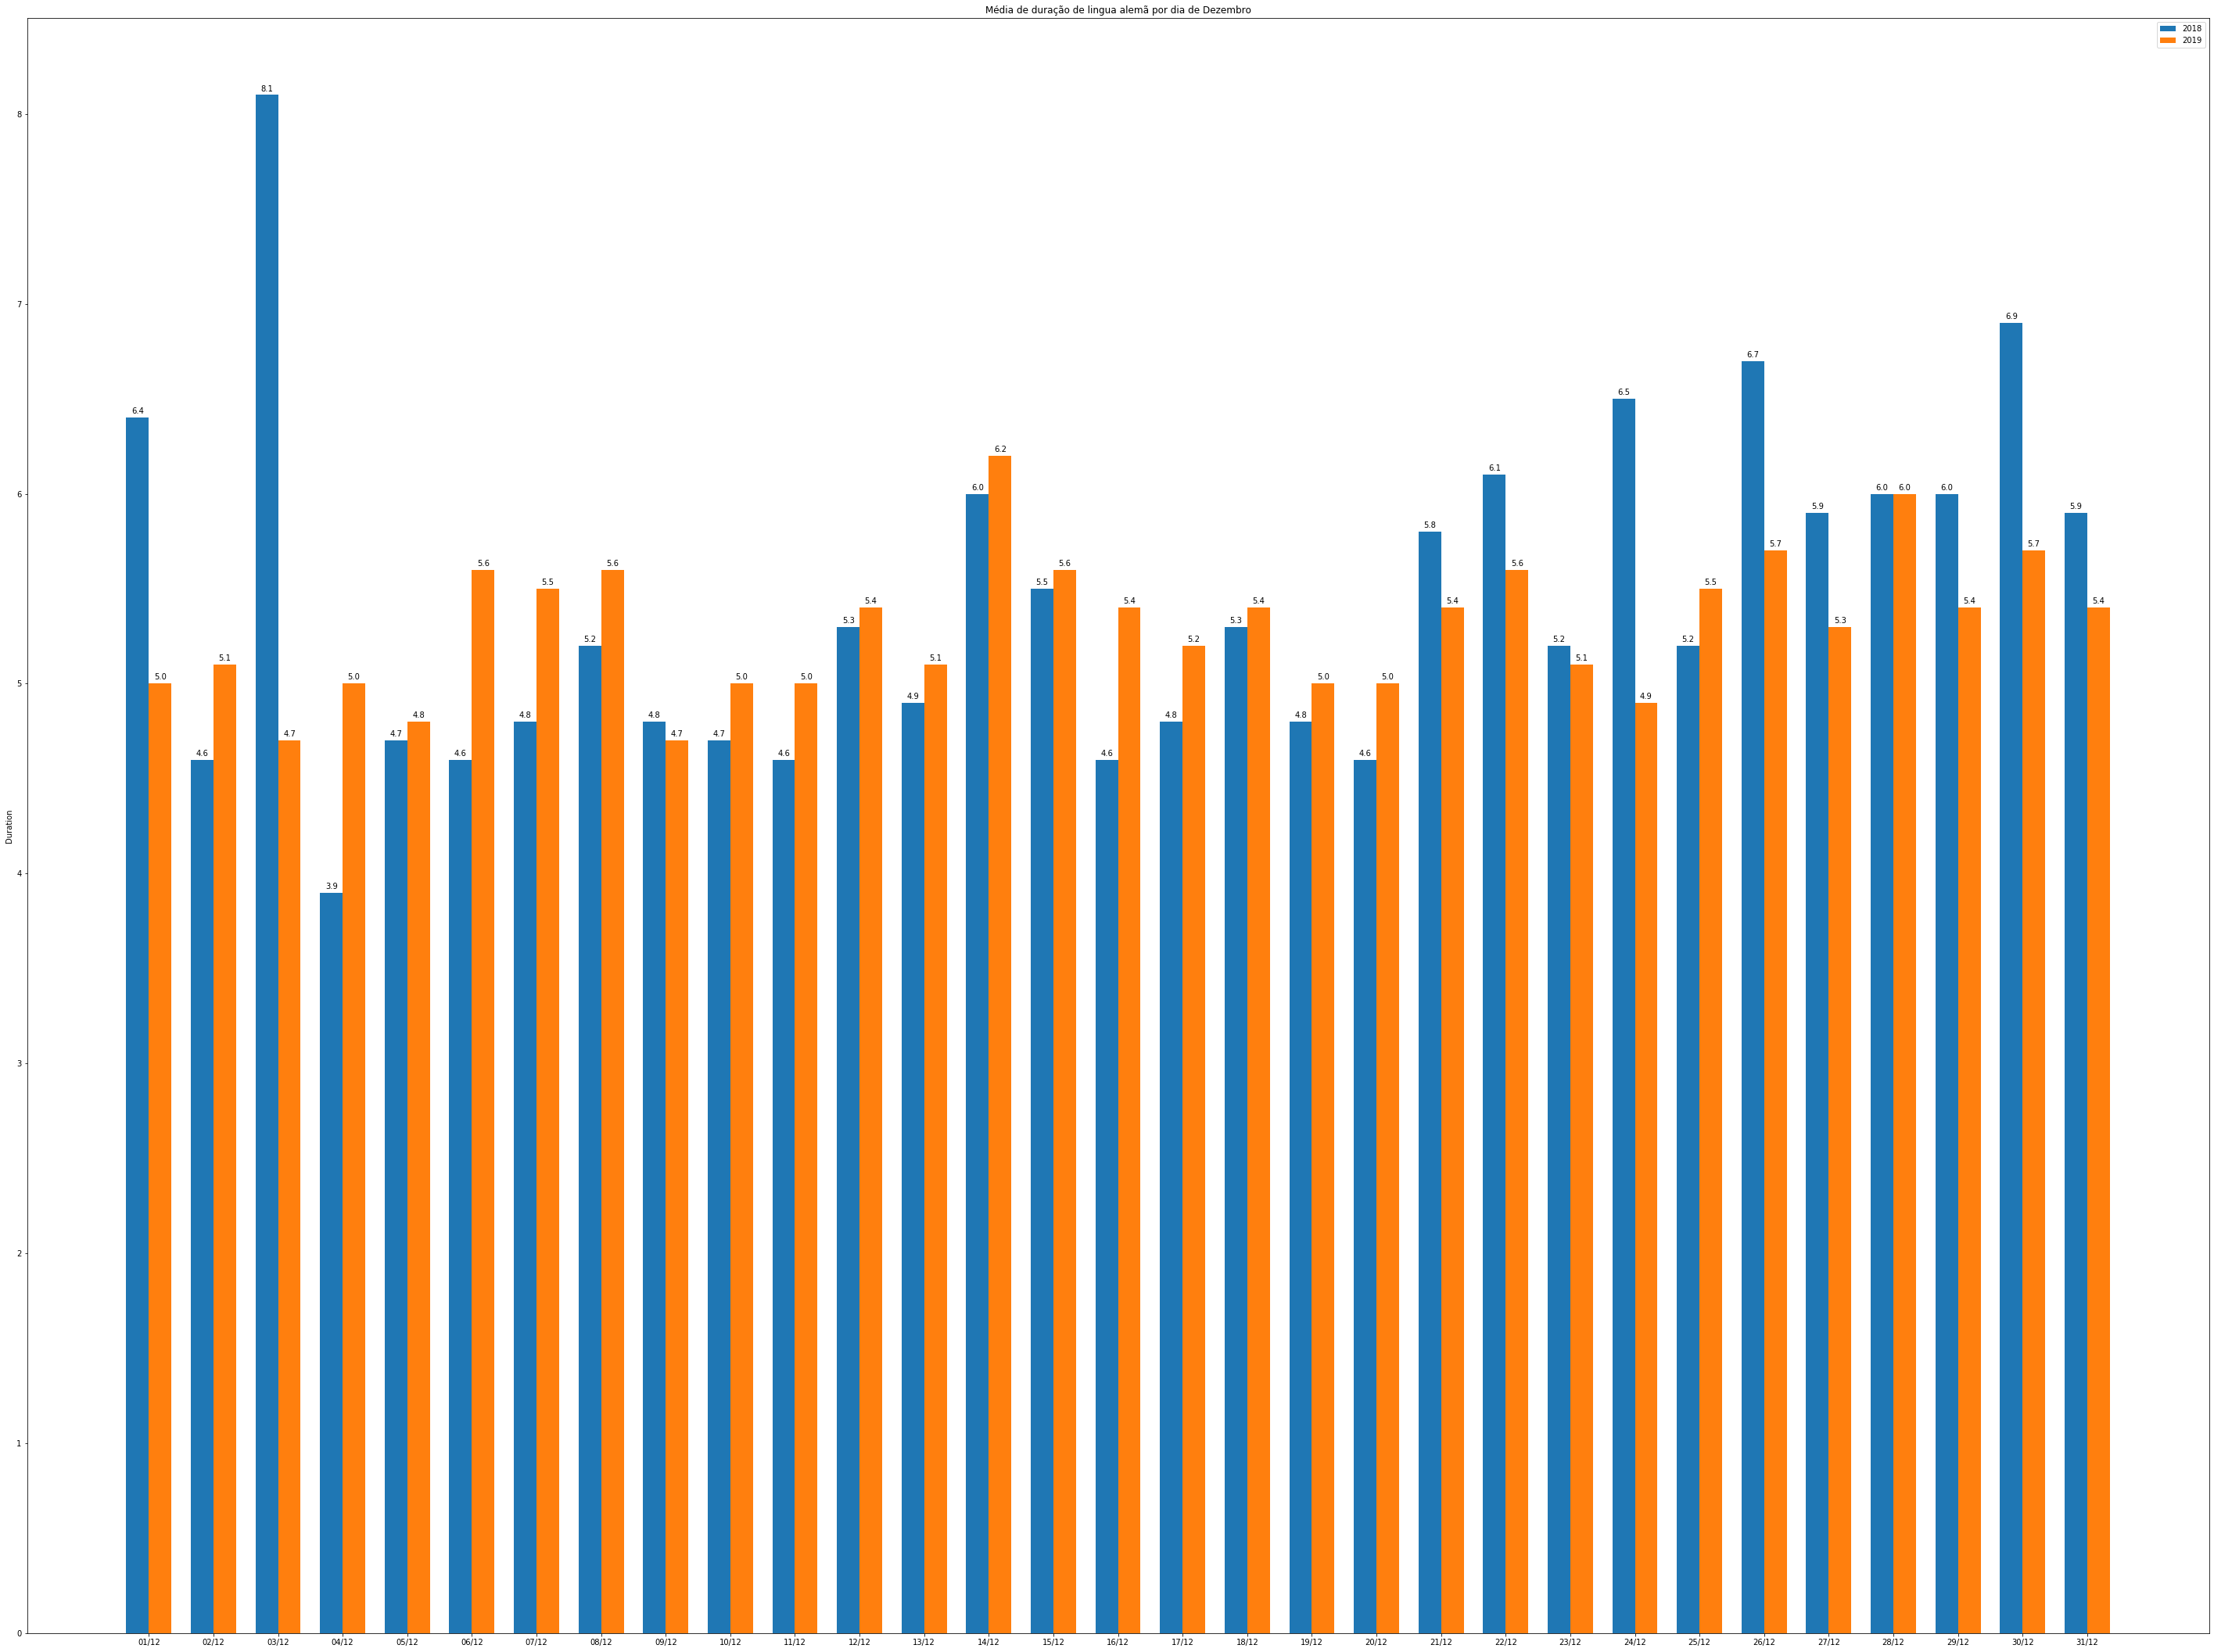

In [5]:
df_dez_2018 = df_2018_german[df_2018_german['Date'].dt.month == 12]

df_dez_2019 = df_2019_german[df_2019_german['Date'].dt.month == 12]



df_dez_2018_medias = df_dez_2018.groupby(df_dez_2018['Date'].dt.day).mean()
df_dez_2018_medias.reset_index(inplace = True)


df_dez_2019_medias = df_dez_2019.groupby(df_dez_2019['Date'].dt.day).mean()
df_dez_2019_medias.reset_index(inplace = True)


means_2018_viewers = df_dez_2018_medias['Viewers'].astype(float).round(1)   # men
means_2019_viewers = df_dez_2019_medias['Viewers'].astype(float).round(1)   # women

means_2018_duration = df_dez_2018_medias['Duration'].astype(float).round(1)   # men
means_2019_duration = df_dez_2019_medias['Duration'].astype(float).round(1)   # women


labels = ['01/12', '02/12', '03/12', '04/12', '05/12', '06/12', '07/12', '08/12', '09/12', '10/12', '11/12', '12/12', '13/12', '14/12', '15/12', '16/12', '17/12', '18/12', '19/12', '20/12', '21/12', '22/12', '23/12',
         '24/12', '25/12', '26/12', '27/12', '28/12', '29/12', '30/12', '31/12']




# print(df_dez_2018_medias)


x = np.arange(len(labels))  # the label locations        label='piroca'
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (50 , 38))
rects1 = ax.bar((x) - width/2, means_2018_viewers, width, label='2018')
rects2 = ax.bar((x) + width/2, means_2019_viewers, width, label='2019')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Viewers')
ax.set_title('Média de viewers de lingua alemã por dia de Dezembro')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(markerscale = 10)


# ax.set_ylim(3, 7)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.savefig('Imagens/Germany/viewersDez.png')

# plt.show()


fig, ax = plt.subplots(figsize = (50 , 38))
rects1 = ax.bar((x) - width/2, means_2018_duration, width, label='2018')
rects2 = ax.bar((x) + width/2, means_2019_duration, width, label='2019')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Duration')
ax.set_title('Média de duração de lingua alemã por dia de Dezembro')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(markerscale = 10)


# ax.set_ylim(3, 7)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.savefig('Imagens/Germany/durationDez.png')

# plt.show()


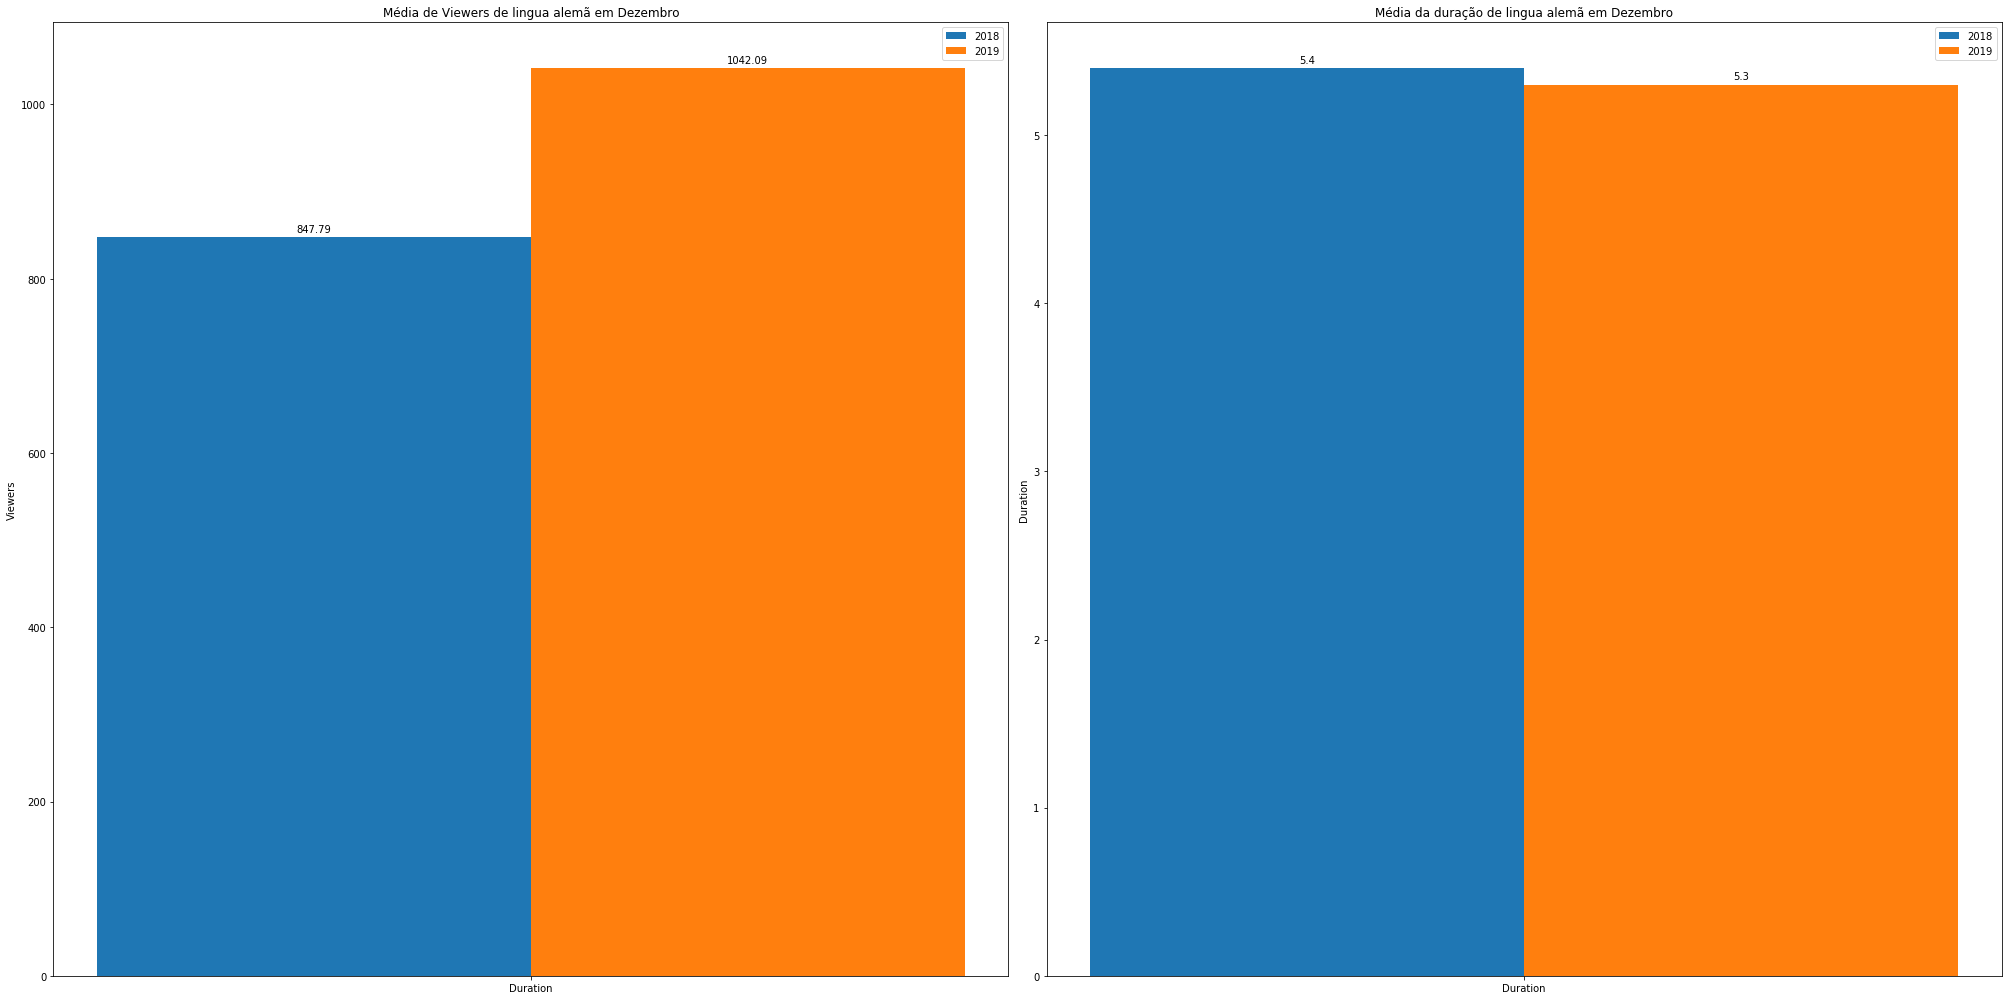

In [6]:
mean_dez_2018_duration = df_dez_2018_medias['Duration'].mean()

mean_dez_2019_duration = df_dez_2019_medias['Duration'].mean()


mean_dez_2018_viewers = df_dez_2018_medias['Viewers'].mean()

mean_dez_2019_viewers = df_dez_2019_medias['Viewers'].mean()


mean_dez_2018_viewers = round(mean_dez_2018_viewers, 2)

mean_dez_2019_viewers = round(mean_dez_2019_viewers, 2)


mean_dez_2018_duration = round(mean_dez_2018_duration, 1)

mean_dez_2019_duration = round(mean_dez_2019_duration, 1)


labels = ['Viewers']

labels1 = ['Duration']


viewers = [mean_dez_2018_viewers , mean_dez_2019_viewers]
duration = [mean_dez_2018_duration , mean_dez_2019_duration]


x = np.arange(len(labels))  # the label locations
x1 = np.arange(len(labels1)) 


width = 0.35  # the width of the bars

fig, (ax, ax1) = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(28, 14))

rects1 = ax.bar((x) - width/2, mean_dez_2018_viewers, width, label='2018')
rects2 = ax.bar((x) + width/2, mean_dez_2019_viewers, width, label='2019')

rects1x = ax1.bar((x1) - width/2, mean_dez_2018_duration, width, label='2018')
rects2x = ax1.bar((x1) + width/2, mean_dez_2019_duration, width, label='2019')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Viewers')
ax.set_title('Média de Viewers de lingua alemã em Dezembro')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(markerscale = 10)



ax1.set_ylabel('Duration')
ax1.set_title('Média da duração de lingua alemã em Dezembro')
ax1.set_xticks(x1)
ax1.set_xticklabels(labels1)
ax1.legend(markerscale = 10)



def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        

        
def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax1.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
        

autolabel(rects1)
autolabel(rects2)


autolabel1(rects1x)
autolabel1(rects2x)


fig.tight_layout()


fig.savefig('Imagens/Germany/comparacaoDez2018_2019.png')

plt.show()


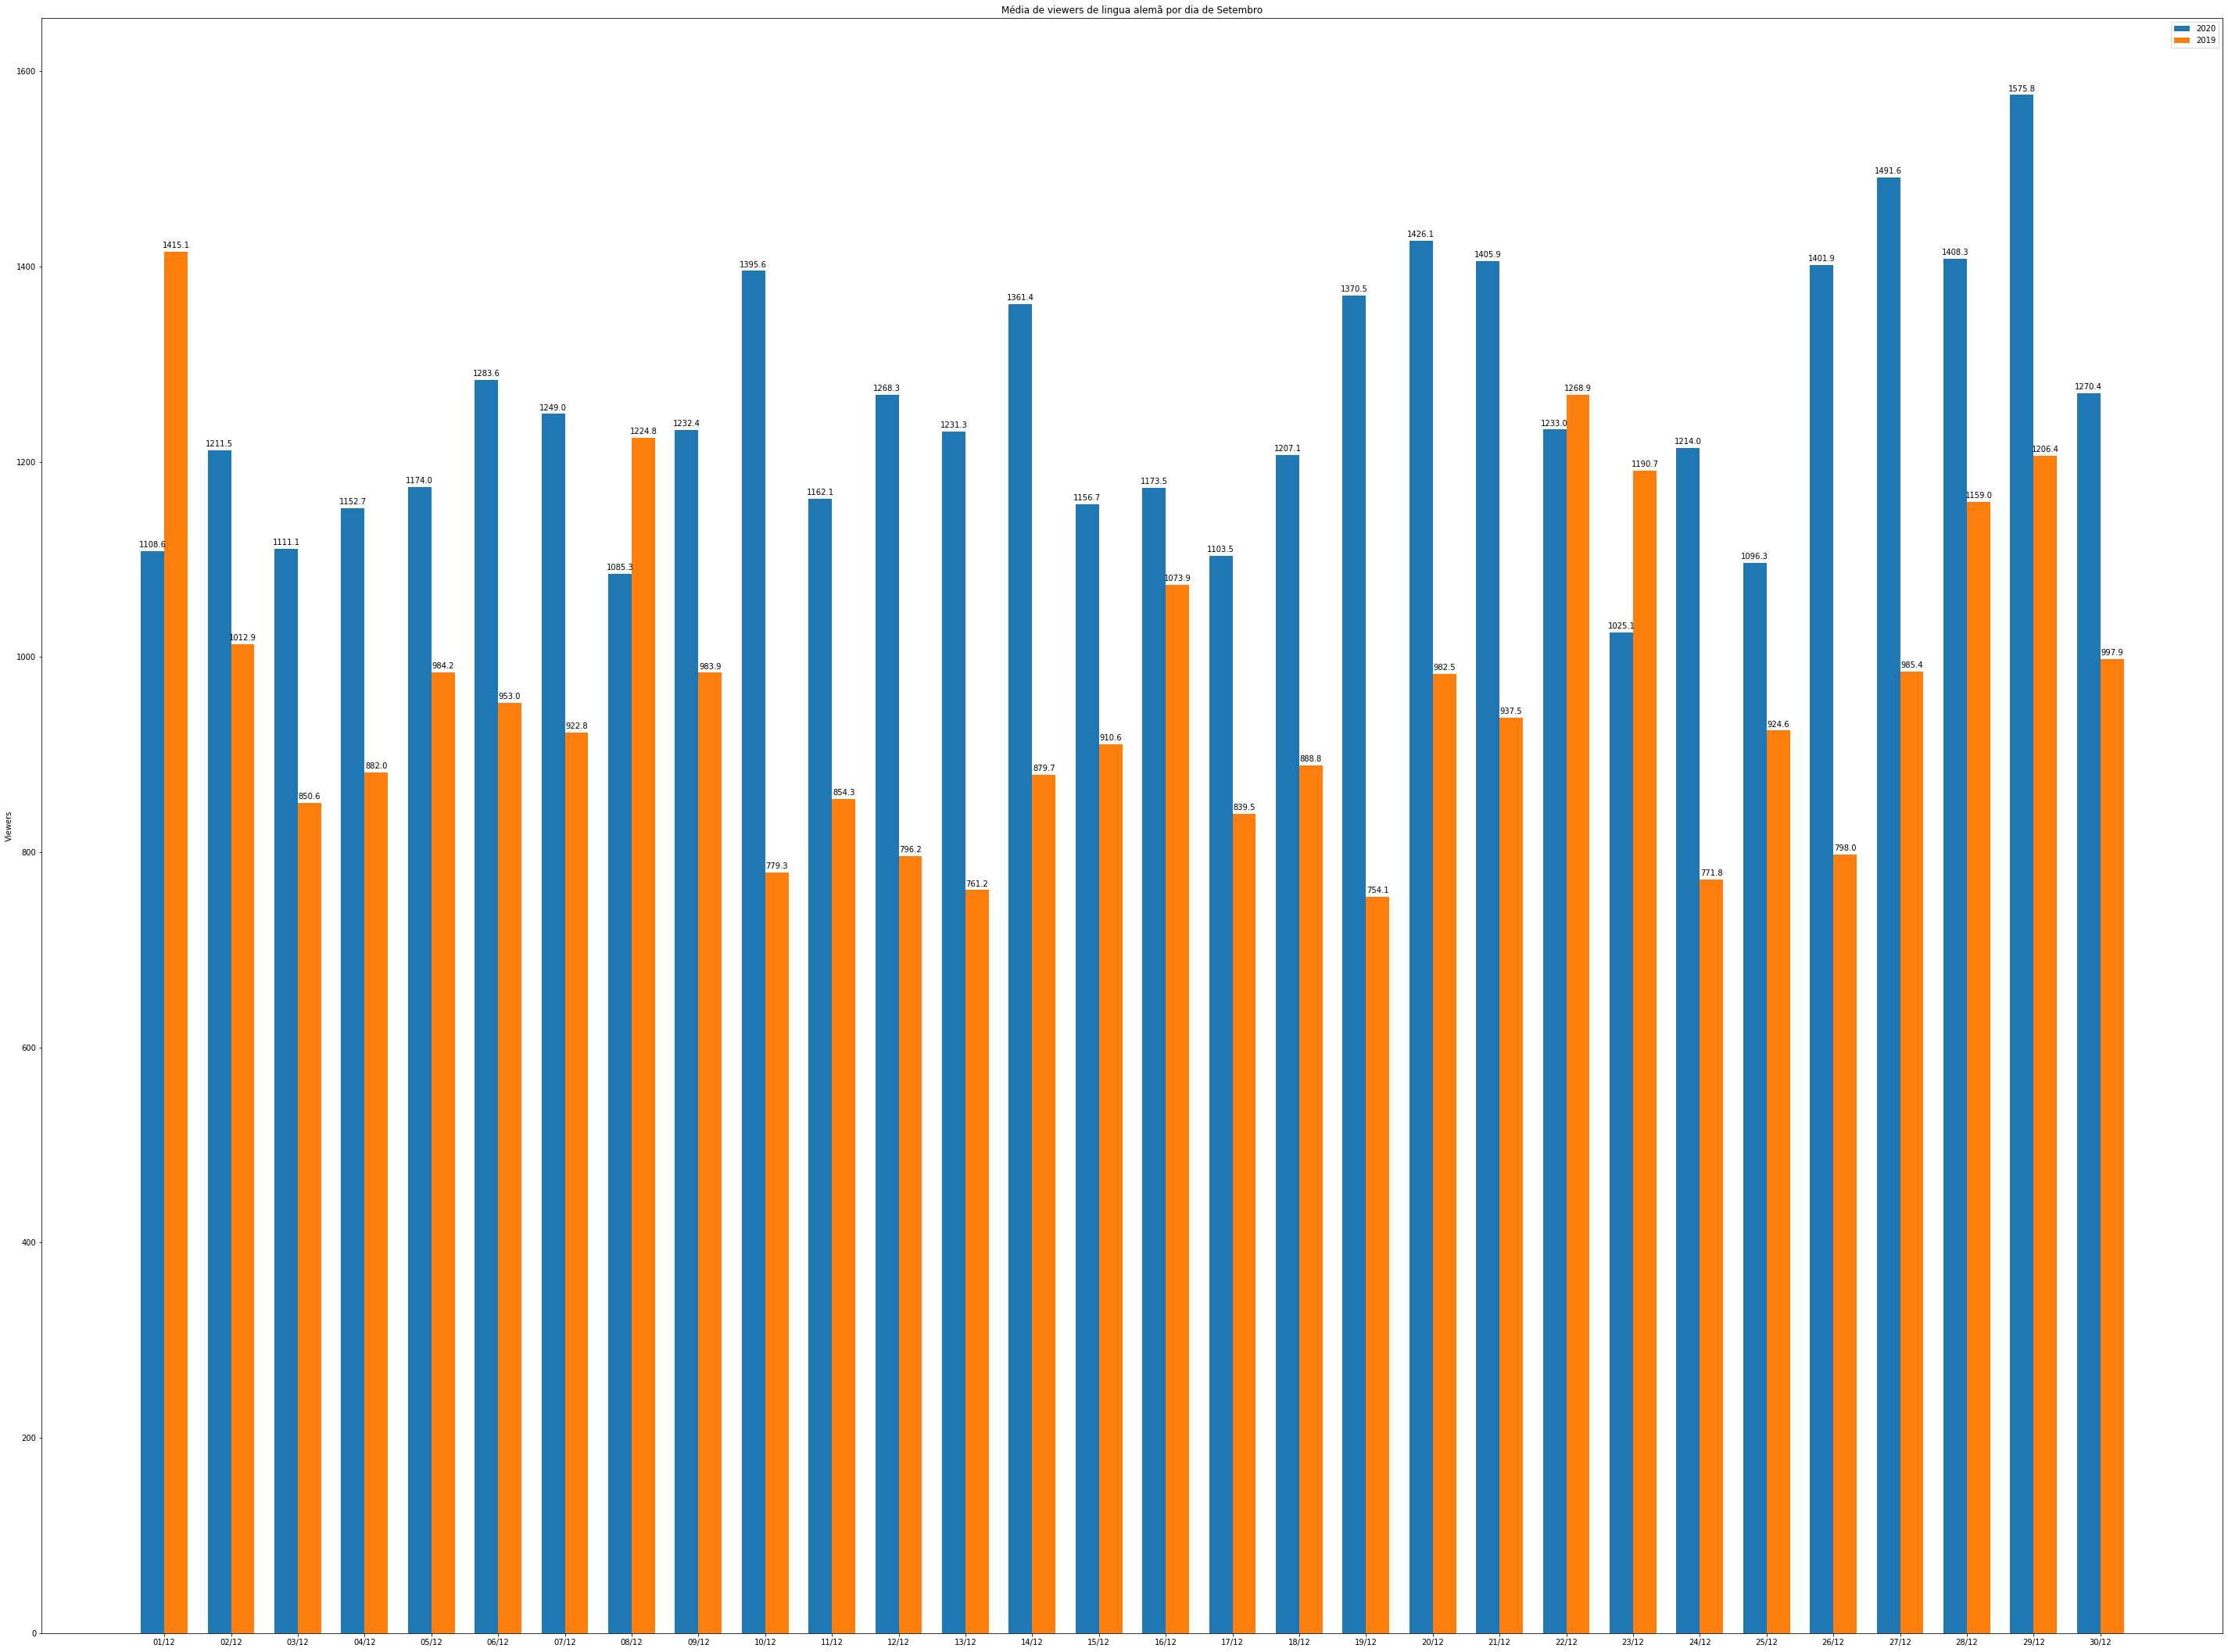

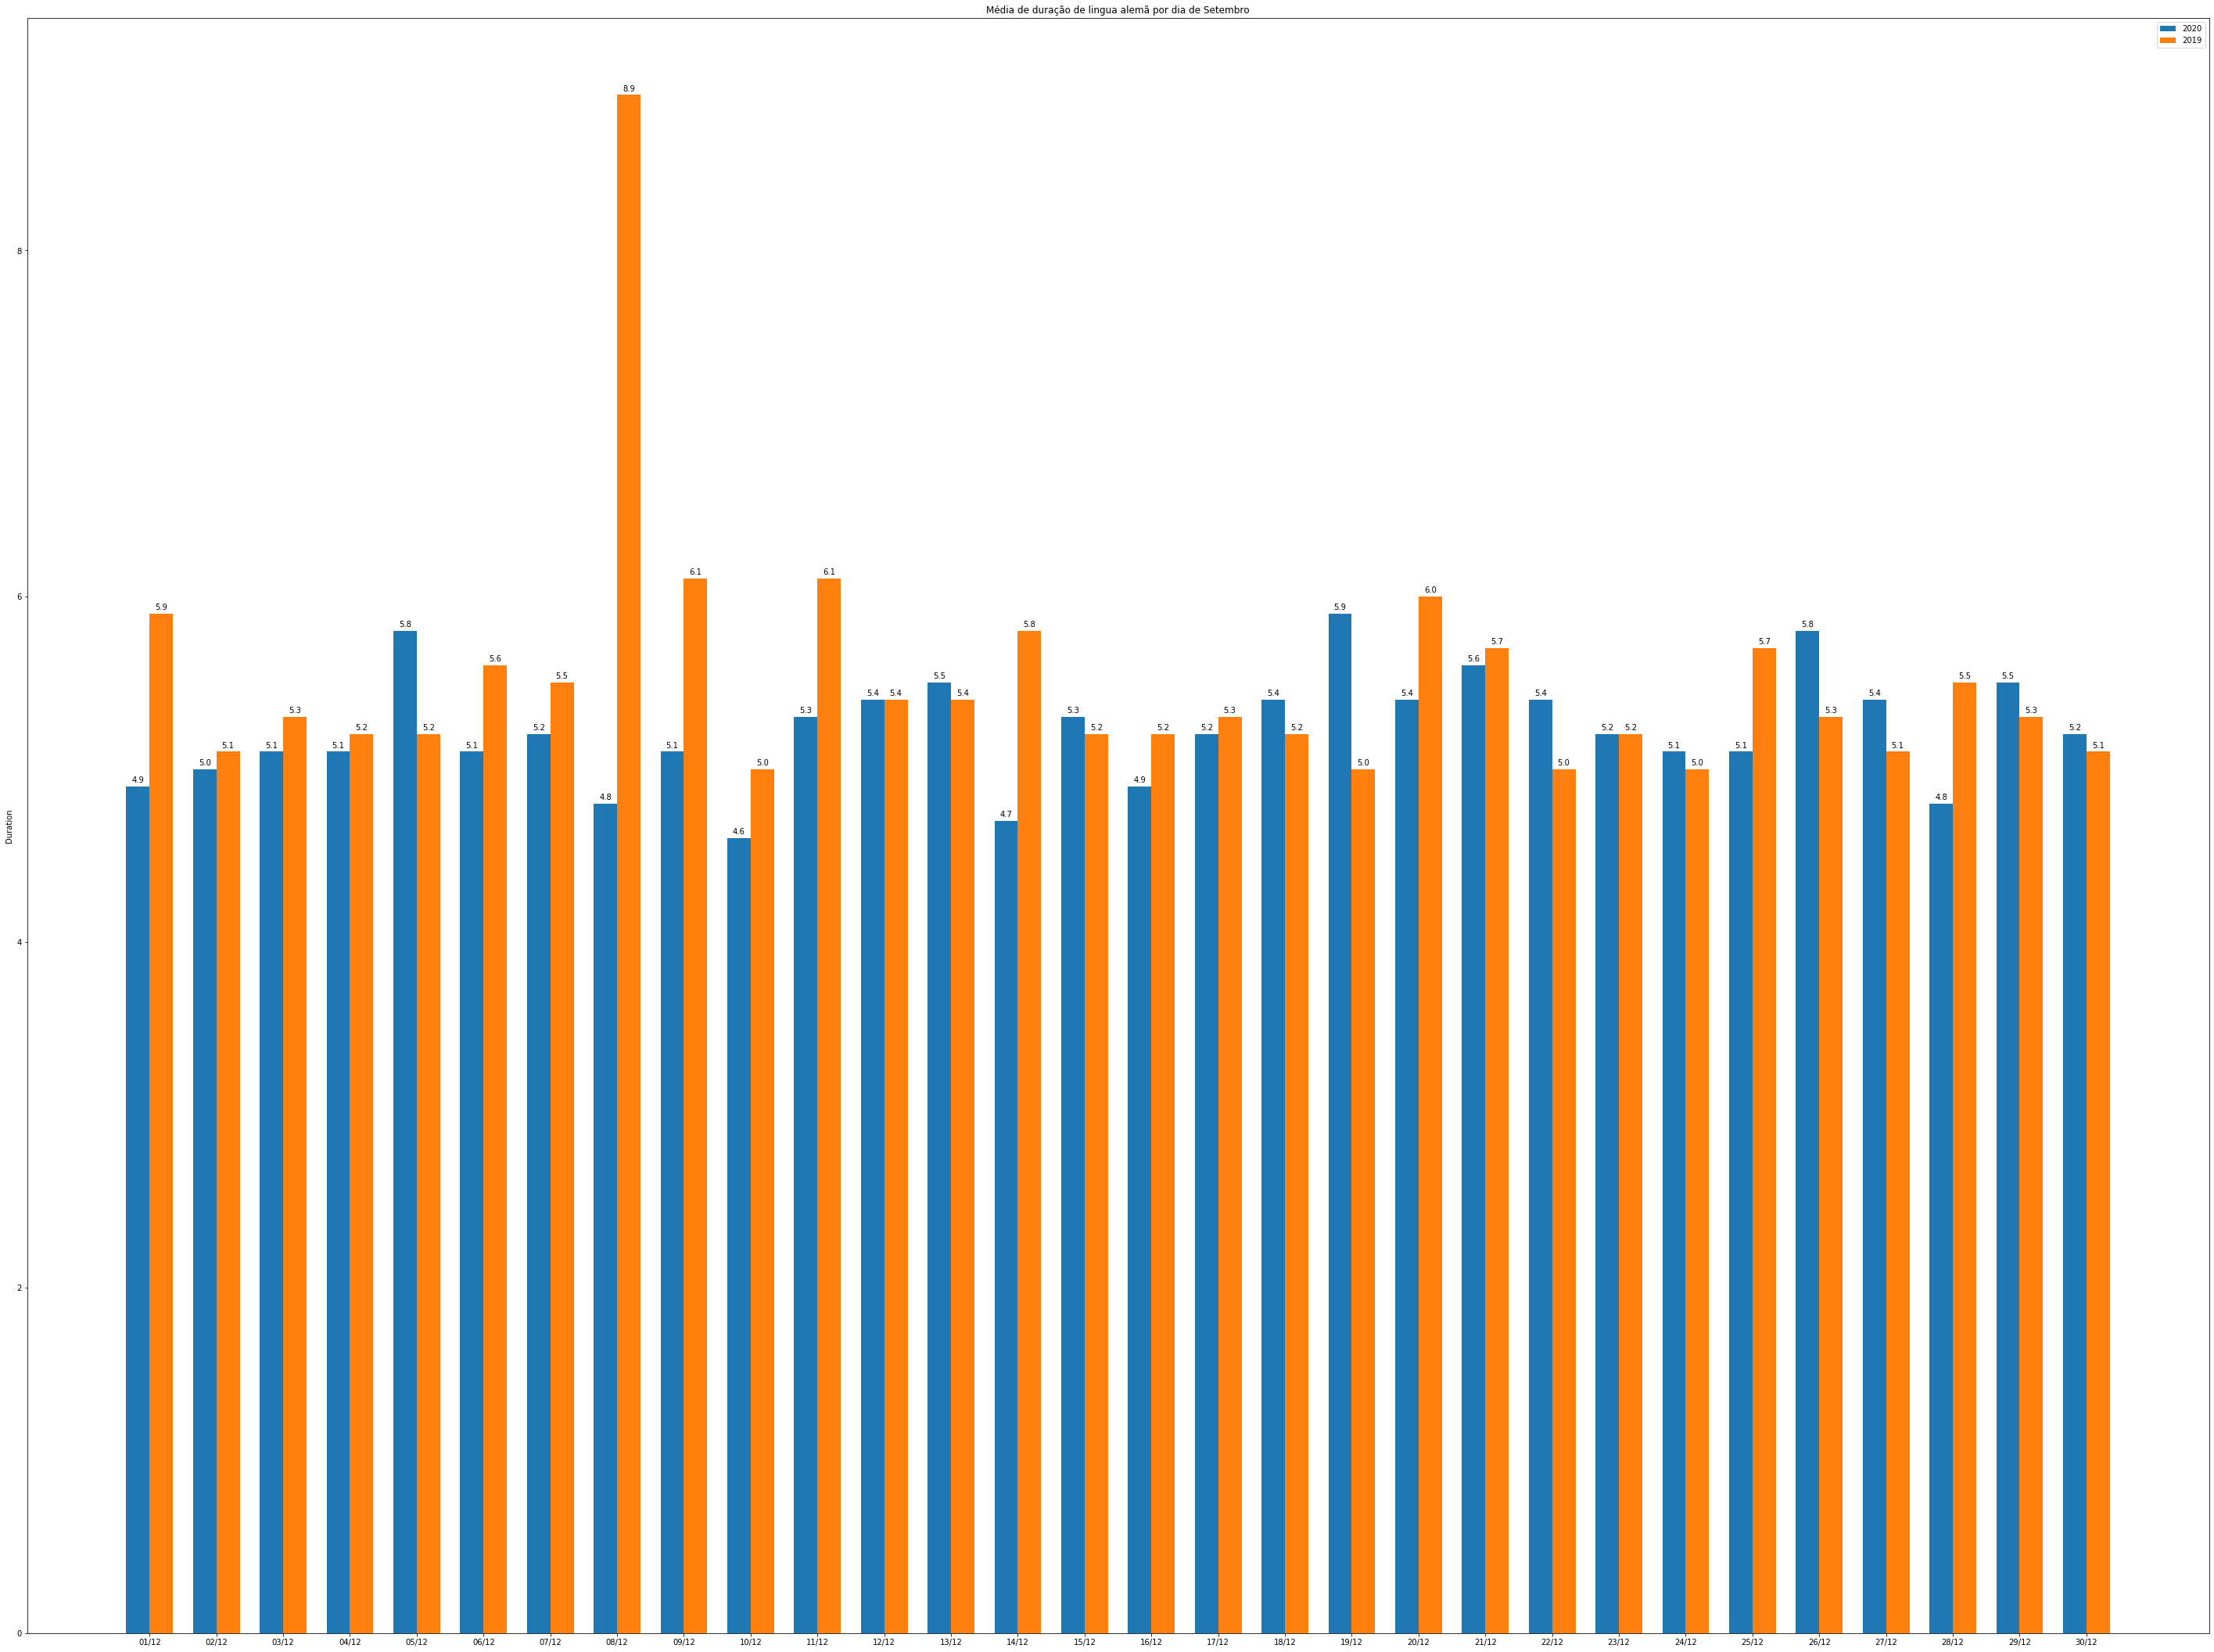

In [7]:
df_set_2020 = df_2020_german[df_2020_german['Date'].dt.month == 9]

df_set_2019 = df_2019_german[df_2019_german['Date'].dt.month == 9]



df_set_2020_medias = df_set_2020.groupby(df_set_2020['Date'].dt.day).mean()
df_set_2020_medias.reset_index(inplace = True)


df_set_2019_medias = df_set_2019.groupby(df_set_2019['Date'].dt.day).mean()
df_set_2019_medias.reset_index(inplace = True)


# print(df_set_2019_medias.mean())
# print(df_set_2020_medias.mean())


labels = ['01/12', '02/12', '03/12', '04/12', '05/12', '06/12', '07/12', '08/12', '09/12', '10/12', '11/12', '12/12', '13/12', '14/12', '15/12', '16/12', '17/12', '18/12', '19/12', '20/12', '21/12', '22/12', '23/12',
         '24/12', '25/12', '26/12', '27/12', '28/12', '29/12', '30/12']



means_2020_viewers = df_set_2020_medias['Viewers'].astype(float).round(1)   # men
means_2019_viewers = df_set_2019_medias['Viewers'].astype(float).round(1)   # women

means_2020_duration = df_set_2020_medias['Duration'].astype(float).round(1)   # men
means_2019_duration = df_set_2019_medias['Duration'].astype(float).round(1)   # women


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (50 , 38))
rects1 = ax.bar((x) - width/2, means_2020_viewers, width, label='2020')
rects2 = ax.bar((x) + width/2, means_2019_viewers, width, label='2019')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Viewers')
ax.set_title('Média de viewers de lingua alemã por dia de Setembro')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(markerscale = 10)


# ax.set_ylim(4, 7)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

# fig.tight_layout()

fig.savefig('Imagens/Germany/viewersSet.png')

plt.show()



fig, ax = plt.subplots(figsize = (50 , 38))
rects1 = ax.bar((x) - width/2, means_2020_duration, width, label='2020')
rects2 = ax.bar((x) + width/2, means_2019_duration, width, label='2019')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Duration')
ax.set_title('Média de duração de lingua alemã por dia de Setembro')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(markerscale = 10)


# ax.set_ylim(4, 7)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

# fig.tight_layout()

fig.savefig('Imagens/Germany/durationSet.png')

plt.show()

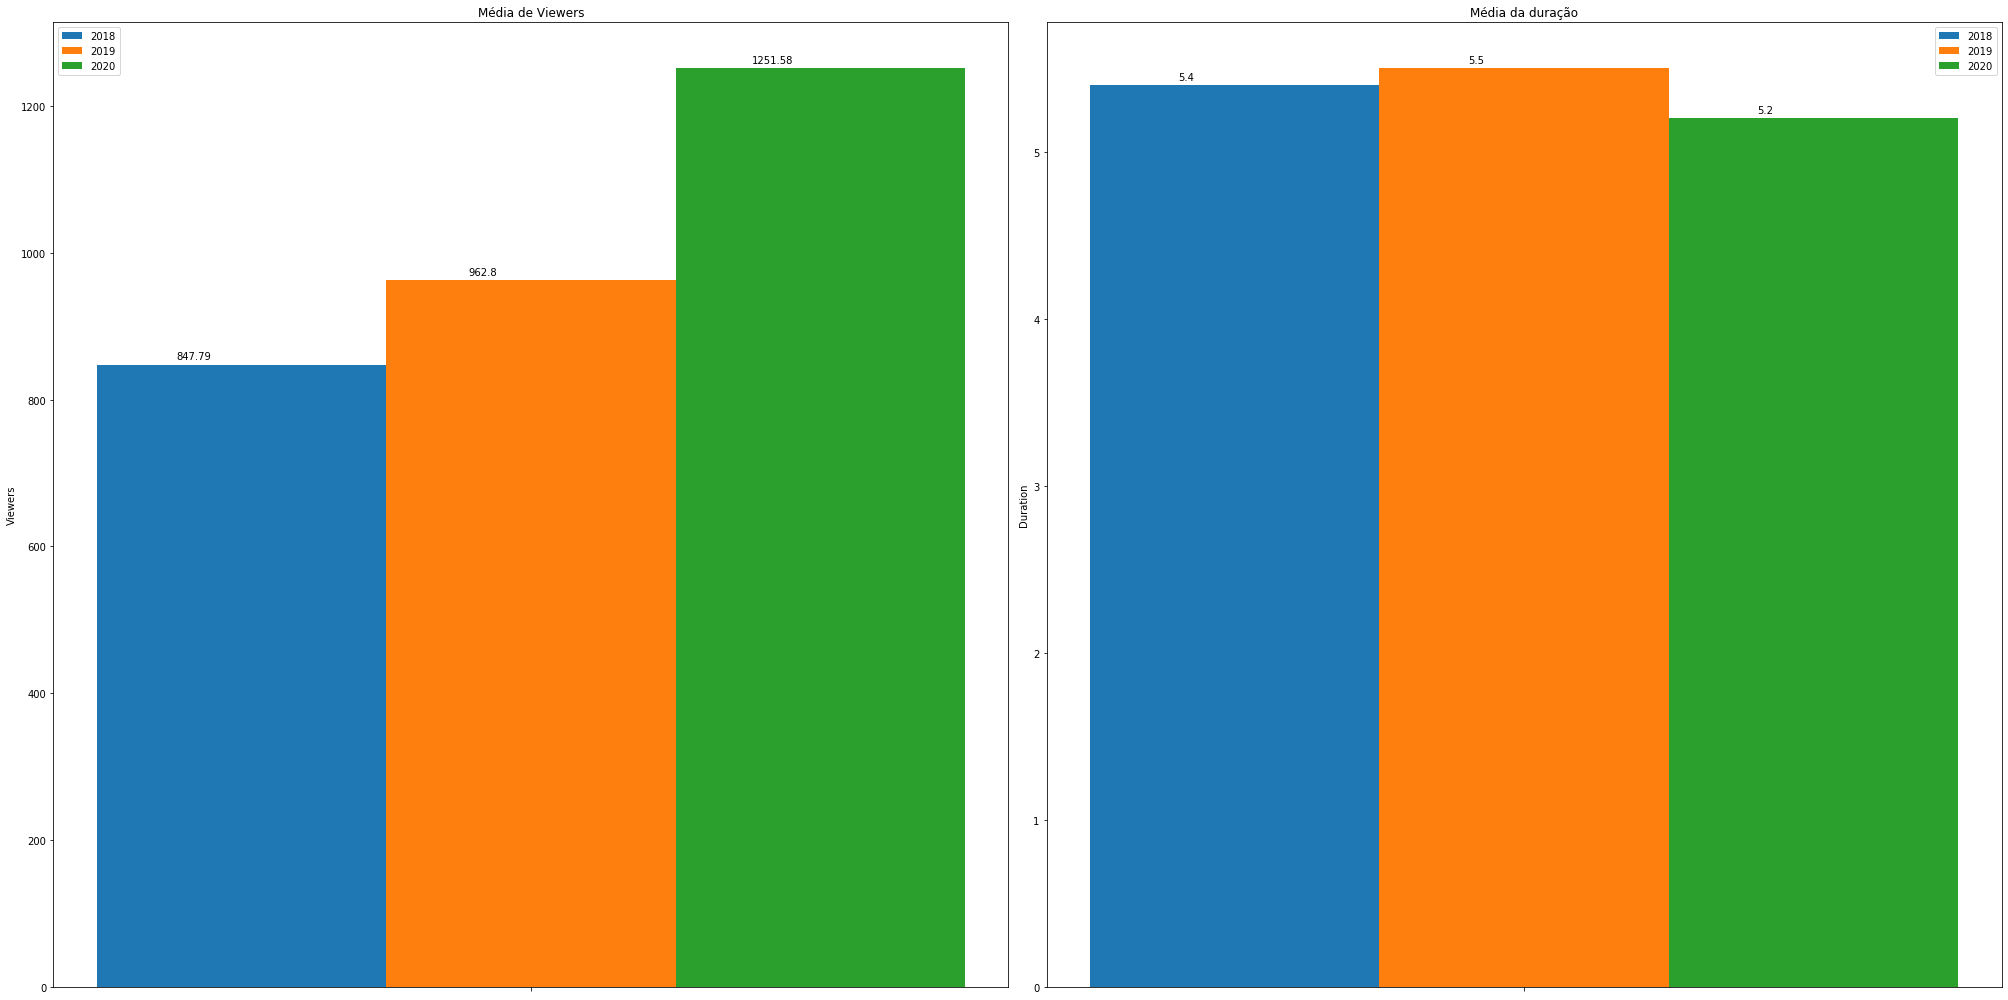

In [12]:
mean_set_2020_duration = df_set_2020['Duration'].mean()

mean_set_2019_duration = df_set_2019['Duration'].mean()


mean_set_2020_viewers = df_set_2020['Viewers'].mean()

mean_set_2019_viewers = df_set_2019['Viewers'].mean()


mean_set_2020_viewers = round(mean_set_2020_viewers, 2)

mean_set_2019_viewers = round(mean_set_2019_viewers, 2)


mean_set_2020_duration = round(mean_set_2020_duration, 1)

mean_set_2019_duration = round(mean_set_2019_duration, 1)


labels = ['Viewers']

labels1 = ['']


viewers = [mean_set_2020_viewers , mean_set_2019_viewers, mean_dez_2018_viewers]
duration = [mean_set_2020_duration , mean_set_2019_duration, mean_dez_2018_duration]


x = np.arange(len(labels))  # the label locations
x1 = np.arange(len(labels1)) 


width = 0.1  # the width of the bars

fig, (ax, ax1) = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(28, 14))

rects1 = ax.bar((x) - width, mean_dez_2018_viewers, width, label='2018')
rects2 = ax.bar((x) , mean_set_2019_viewers, width, label='2019')
rects3 = ax.bar((x) + width, mean_set_2020_viewers, width, label='2020')

rects1x = ax1.bar((x1) - width, mean_dez_2018_duration, width, label='2018')
rects2x = ax1.bar((x1) , mean_set_2019_duration, width, label='2019')
rects3x = ax1.bar((x1) + width, mean_set_2020_duration, width, label='2020')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Viewers')
ax.set_xlabel('')
ax.set_title('Média de Viewers')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(markerscale = 10)



ax1.set_ylabel('Duration')
ax1.set_title('Média da duração')
ax1.set_xticks(x1)
ax1.set_xticklabels(labels1)
ax1.legend(markerscale = 10)



def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 3, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        

        
def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax1.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 3, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
        

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


autolabel1(rects1x)
autolabel1(rects2x)
autolabel1(rects3x)


fig.tight_layout()


fig.savefig('Imagens/Germany/comparacao2018_2019_2020.png')

plt.show()


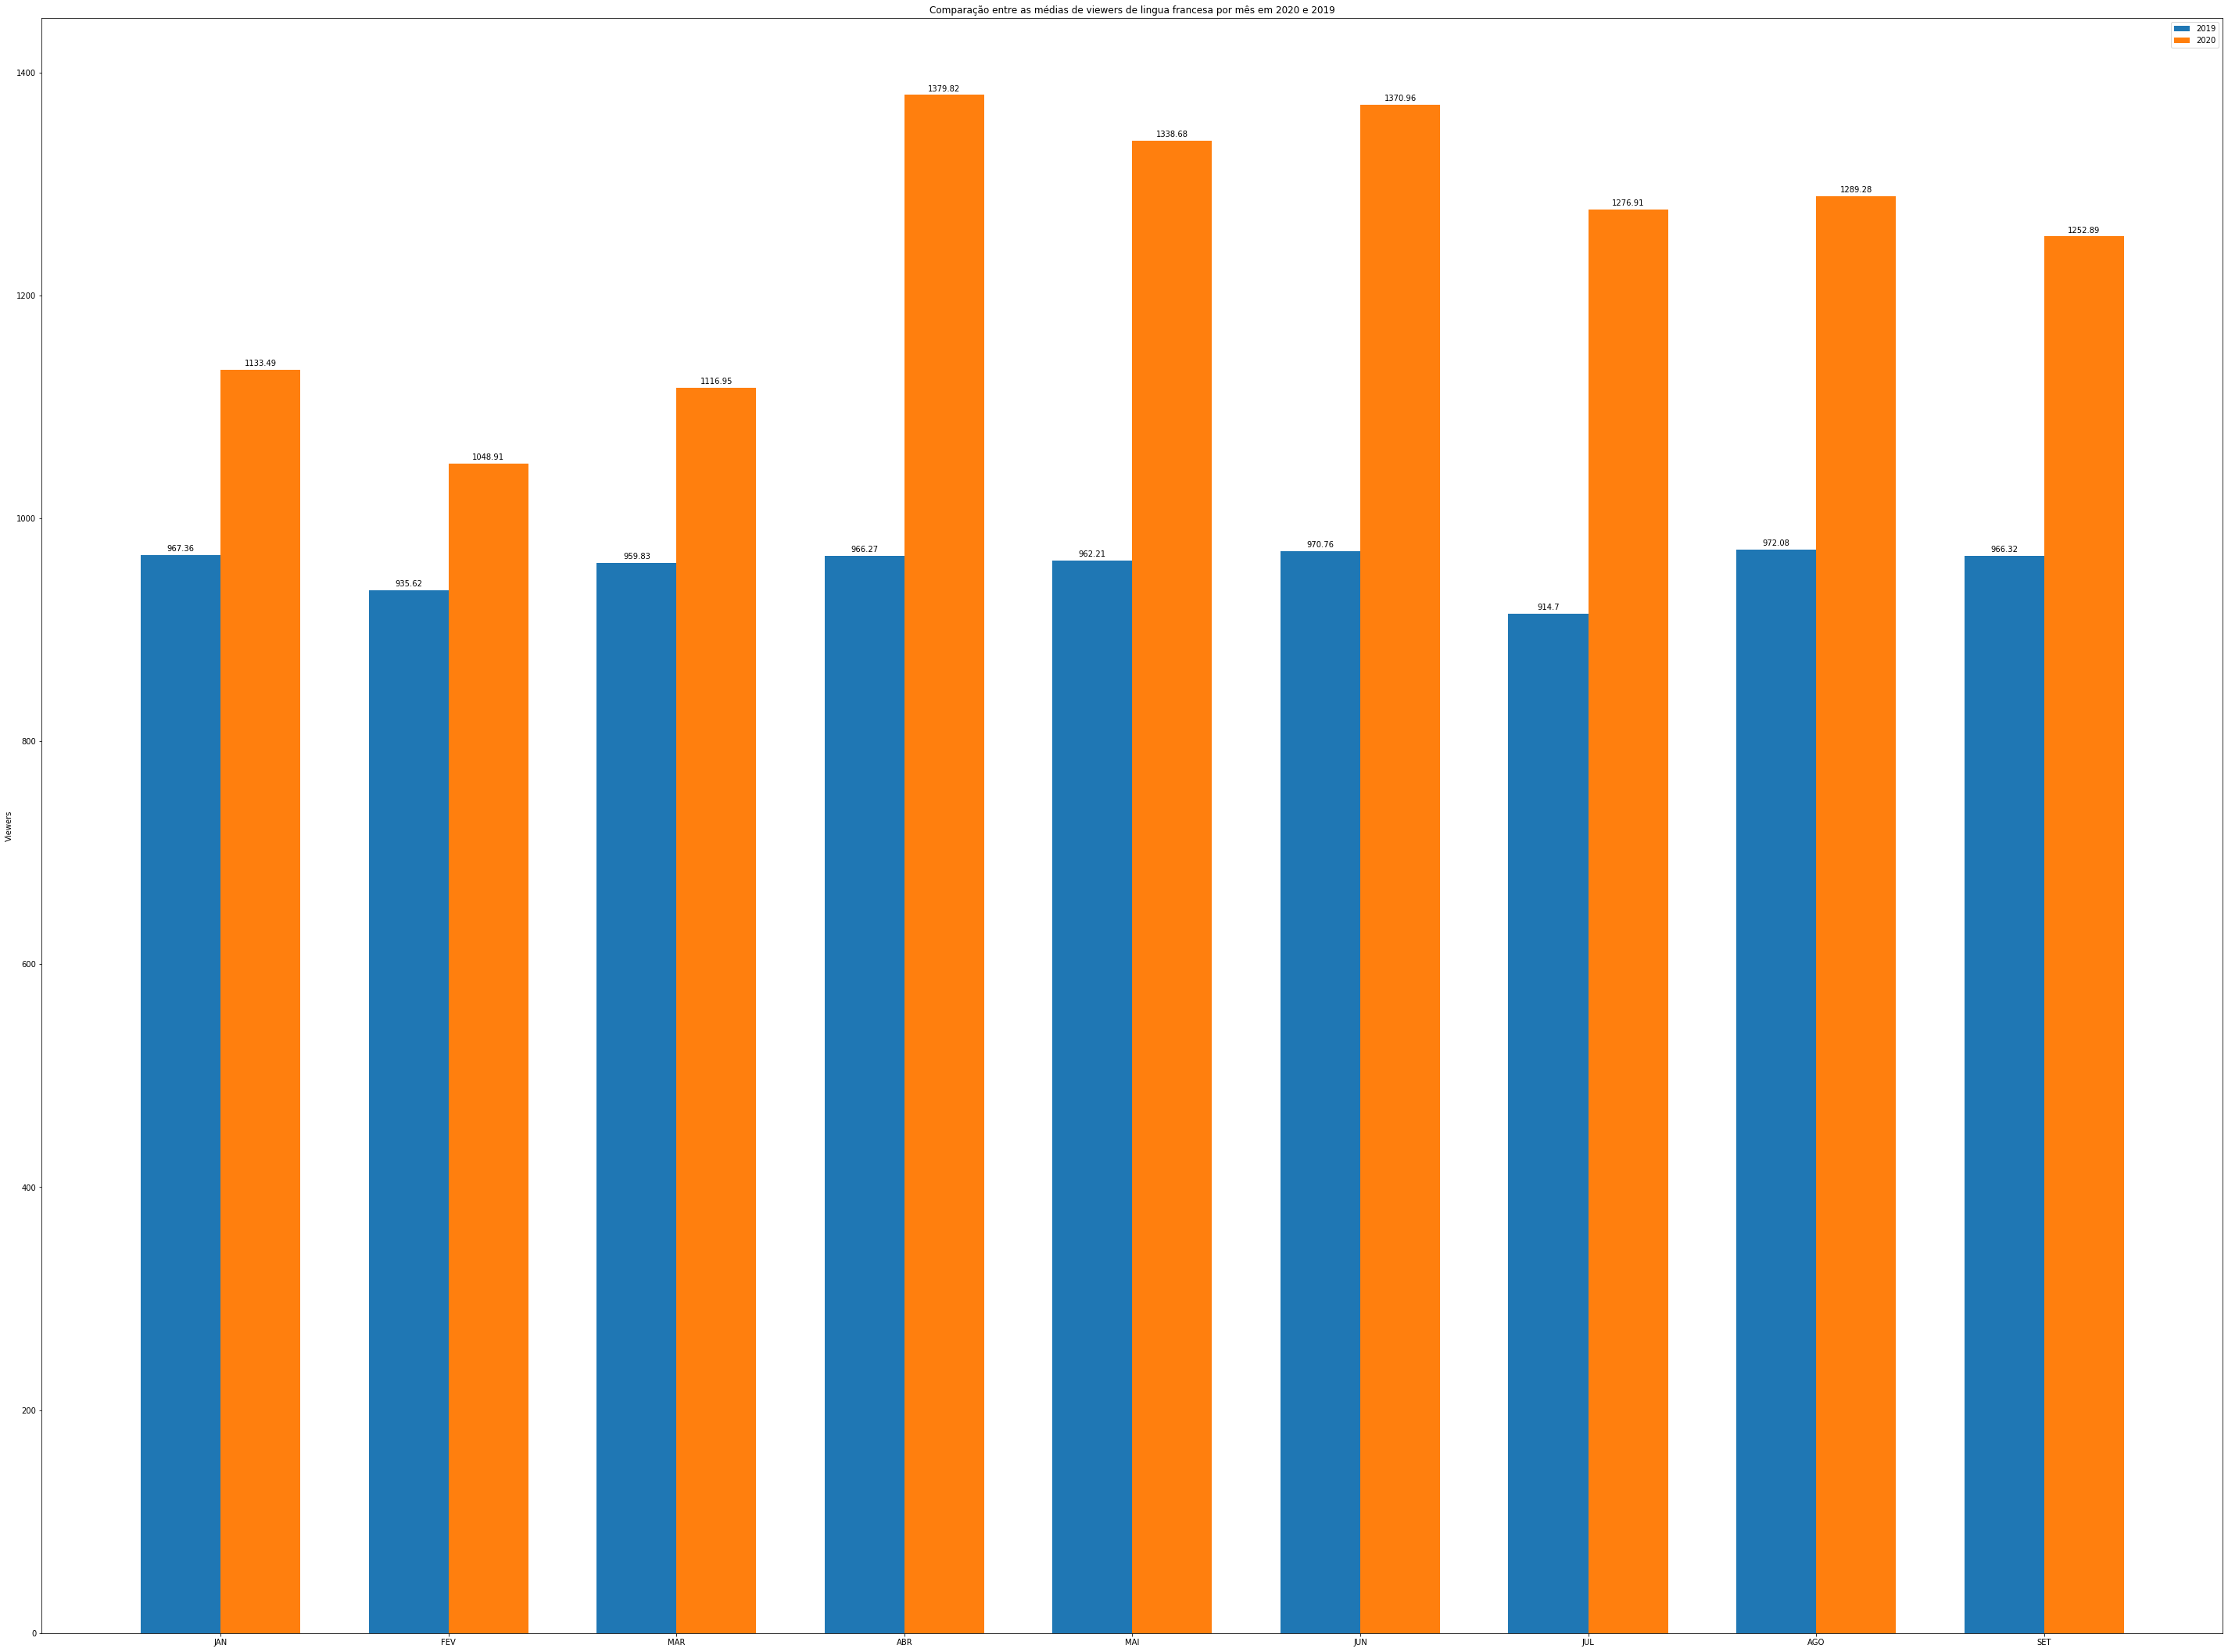

In [9]:
df_2020_01 = df_2020_german[df_2020_german['Date'].dt.month == 1]
df_2020_02 = df_2020_german[df_2020_german['Date'].dt.month == 2]
df_2020_03 = df_2020_german[df_2020_german['Date'].dt.month == 3]
df_2020_04 = df_2020_german[df_2020_german['Date'].dt.month == 4]
df_2020_05 = df_2020_german[df_2020_german['Date'].dt.month == 5]
df_2020_06 = df_2020_german[df_2020_german['Date'].dt.month == 6]
df_2020_07 = df_2020_german[df_2020_german['Date'].dt.month == 7]
df_2020_08 = df_2020_german[df_2020_german['Date'].dt.month == 8]
df_2020_09 = df_2020_german[df_2020_german['Date'].dt.month == 9]

df_2019_01 = df_2019_german[df_2019_german['Date'].dt.month == 1]
df_2019_02 = df_2019_german[df_2019_german['Date'].dt.month == 2]
df_2019_03 = df_2019_german[df_2019_german['Date'].dt.month == 3]
df_2019_04 = df_2019_german[df_2019_german['Date'].dt.month == 4]
df_2019_05 = df_2019_german[df_2019_german['Date'].dt.month == 5]
df_2019_06 = df_2019_german[df_2019_german['Date'].dt.month == 6]
df_2019_07 = df_2019_german[df_2019_german['Date'].dt.month == 7]
df_2019_08 = df_2019_german[df_2019_german['Date'].dt.month == 8]
df_2019_09 = df_2019_german[df_2019_german['Date'].dt.month == 9]


df_2020_01_medias = df_2020_01.groupby(df_2020_01['Date'].dt.day).mean()
df_2020_01_medias.reset_index(inplace = True)


df_2020_02_medias = df_2020_02.groupby(df_2020_02['Date'].dt.day).mean()
df_2020_02_medias.reset_index(inplace = True)


df_2020_03_medias = df_2020_03.groupby(df_2020_03['Date'].dt.day).mean()
df_2020_03_medias.reset_index(inplace = True)


df_2020_04_medias = df_2020_04.groupby(df_2020_04['Date'].dt.day).mean()
df_2020_04_medias.reset_index(inplace = True)


df_2020_05_medias = df_2020_05.groupby(df_2020_05['Date'].dt.day).mean()
df_2020_05_medias.reset_index(inplace = True)


df_2020_06_medias = df_2020_06.groupby(df_2020_06['Date'].dt.day).mean()
df_2020_06_medias.reset_index(inplace = True)


df_2020_07_medias = df_2020_07.groupby(df_2020_07['Date'].dt.day).mean()
df_2020_07_medias.reset_index(inplace = True)


df_2020_08_medias = df_2020_08.groupby(df_2020_08['Date'].dt.day).mean()
df_2020_08_medias.reset_index(inplace = True)


df_2020_09_medias = df_2020_09.groupby(df_2020_09['Date'].dt.day).mean()
df_2020_09_medias.reset_index(inplace = True)







df_2019_01_medias = df_2019_01.groupby(df_2019_01['Date'].dt.day).mean()
df_2019_01_medias.reset_index(inplace = True)


df_2019_02_medias = df_2019_02.groupby(df_2019_02['Date'].dt.day).mean()
df_2019_02_medias.reset_index(inplace = True)


df_2019_03_medias = df_2019_03.groupby(df_2019_03['Date'].dt.day).mean()
df_2019_03_medias.reset_index(inplace = True)


df_2019_04_medias = df_2019_04.groupby(df_2019_04['Date'].dt.day).mean()
df_2019_04_medias.reset_index(inplace = True)


df_2019_05_medias = df_2019_05.groupby(df_2019_05['Date'].dt.day).mean()
df_2019_05_medias.reset_index(inplace = True)


df_2019_06_medias = df_2019_06.groupby(df_2019_06['Date'].dt.day).mean()
df_2019_06_medias.reset_index(inplace = True)


df_2019_07_medias = df_2019_07.groupby(df_2019_07['Date'].dt.day).mean()
df_2019_07_medias.reset_index(inplace = True)


df_2019_08_medias = df_2019_08.groupby(df_2019_08['Date'].dt.day).mean()
df_2019_08_medias.reset_index(inplace = True)


df_2019_09_medias = df_2019_09.groupby(df_2019_09['Date'].dt.day).mean()
df_2019_09_medias.reset_index(inplace = True)




labels = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET']


viewers_2020 = pd.DataFrame([df_2020_01_medias.Viewers.mean(), df_2020_02_medias.Viewers.mean(), df_2020_03_medias.Viewers.mean(), df_2020_04_medias.Viewers.mean(), df_2020_05_medias.Viewers.mean(), df_2020_06_medias.Viewers.mean(), 
          df_2020_07_medias.Viewers.mean(), df_2020_08_medias.Viewers.mean(), df_2020_09_medias.Viewers.mean()])

duration_2020 = pd.DataFrame([df_2020_01_medias.Duration.mean(), df_2020_02_medias.Duration.mean(), df_2020_03_medias.Duration.mean(), df_2020_04_medias.Duration.mean(), df_2020_05_medias.Duration.mean(), df_2020_06_medias.Duration.mean(), 
          df_2020_07_medias.Duration.mean(), df_2020_08_medias.Duration.mean(), df_2020_09_medias.Duration.mean()])


viewers_2019 = pd.DataFrame([df_2019_01_medias.Viewers.mean(), df_2019_02_medias.Viewers.mean(), df_2019_03_medias.Viewers.mean(), df_2019_04_medias.Viewers.mean(), df_2019_05_medias.Viewers.mean(), df_2019_06_medias.Viewers.mean(), 
          df_2019_07_medias.Viewers.mean(), df_2019_08_medias.Viewers.mean(), df_2019_09_medias.Viewers.mean()])

duration_2019 = pd.DataFrame([df_2019_01_medias.Duration.mean(), df_2019_02_medias.Duration.mean(), df_2019_03_medias.Duration.mean(), df_2019_04_medias.Duration.mean(), df_2019_05_medias.Duration.mean(), df_2019_06_medias.Duration.mean(), 
          df_2019_07_medias.Duration.mean(), df_2019_08_medias.Duration.mean(), df_2019_09_medias.Duration.mean()])


viewers_2020 = viewers_2020.round(2)
duration_2020 = duration_2020.astype(float).round(1)

viewers_2019 = viewers_2019.round(2)
duration_2019 = duration_2019.astype(float).round(1)


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (50 , 38))
rects1 = ax.bar((x) - width/2 , viewers_2019[0], width, label='2019')
rects2 = ax.bar((x) + width/2, viewers_2020[0], width, label='2020')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Viewers')
ax.set_title('Comparação entre as médias de viewers de lingua alemã por mês em 2020 e 2019')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(markerscale = 10)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

# fig.tight_layout()

fig.savefig('Imagens/Germany/compViewersMeses2019_2020.png')


plt.show()
